# Data Mining: Dimensionality Reduction Methods, Principal Component Analysis (PCA)
## Jessica Schmidt

# PART I: Research Question
## A1. Research Question for PCA
Can we identify the principal components of our patients via Principal Component Analysis of the medical dataset?

## A2. Goal of the Analysis
The goal of the analysis is to perform PCA of the medical dataset to determine the principal components of our patients.

# PART II: Method Justification
## B1. How PCA Analyzes the Dataset and Expected Outcomes
Principal Component Analysis is a dimensionality reduction method. Essentially, this means that it assesses the "weight" or importance of every variable to determine which components are the most important - these are known as the "principal components" - then it allows you to drop the unimportant ones without losing too much information. It is used as an intermediate step in data analysis when there are too many input variables to produce a useful analysis(Source: Origin Lab)

The expected outcome of the analysis is that we will be able to identify how many components in the medical dataset are the most important so that we can then drop the unimportant ones without losing too much vital information, thus reducing the dimensionality of the dataset and enabling more useful future analysis.

## B2. Assumption of PCA
An assumption of PCA is that there must be a linear relationship between the variables (source: Laerd Statistics).

# PART III: Data Preparation (source: D212 Webinars)
## C1. Continuous Dataset Variables for PCA
For the requirements of this analysis, all quantitative variables will be analyzed:
1. Age ("Age")
2. Number of Children ("Children")
3. Income ("Income")
4. Vitamin D Levels ("VitD_levels")
5. Vitamin D Supplements ("vitD_supp")
6. Number of Doctor Visits ("Doc_visits")
7. Number of Full Meals Eaten ("Full_meals_eaten")
8. Days of Initial Hospitalization ("Initial_days")
9. Total Charges ("TotalCharge")
10. Total Additional Charges ("Additional_charges")
11. Latitude ("Lat")
12. Longitude ("Lng")
13. Population ("Population")

## C2. Standardizing the Continuous Dataset Variables and Copy of the Cleaned Dataset

Please see the cleaned dataset that is also being submitted as part of this PA.

In [1]:
# Install Relevant Packages and Libraries

# Standard Imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# To Normalize the Data and for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import CSV File
df = pd.read_csv('/Users/astro/Downloads/medical_clean.csv')

# Examine the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# Print the header
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.describe(include = 'all').round(2)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00,10000,10000,10000,10000,10000,10000,10000.00,10000.00,10000.00,...,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
unique,NaN,10000,10000,10000,6072,52,1607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,36,553,118,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50,NaN,NaN,NaN,NaN,NaN,NaN,50159.32,38.75,-91.24,...,5312.17,12934.53,3.52,3.51,3.51,3.52,3.50,3.52,3.49,3.51
std,2886.90,NaN,NaN,NaN,NaN,NaN,NaN,27469.59,5.40,15.21,...,2180.39,6542.60,1.03,1.03,1.03,1.04,1.03,1.03,1.02,1.04
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,610.00,17.97,-174.21,...,1938.31,3125.70,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2500.75,NaN,NaN,NaN,NaN,NaN,NaN,27592.00,35.26,-97.35,...,3179.37,7986.49,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
50%,5000.50,NaN,NaN,NaN,NaN,NaN,NaN,50207.00,39.42,-88.40,...,5213.95,11573.98,4.00,3.00,4.00,4.00,3.00,4.00,3.00,3.00
75%,7500.25,NaN,NaN,NaN,NaN,NaN,NaN,72411.75,42.04,-80.44,...,7459.70,15626.49,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00


In [5]:
# Standardizing the data
scaled_df = scaler.fit_transform(df[['Age', 'Children', 'Income', 'VitD_levels', 'vitD_supp', 'Doc_visits', 'Full_meals_eaten', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Lat', 'Lng', 'Population']])
scaled_df

array([[-0.02479466, -0.50712929,  1.61591429, ..., -0.81466764,
         0.29713444, -0.47316821],
       [-0.1217056 ,  0.417277  ,  0.22144303, ..., -1.46330542,
         0.39552225,  0.09024181],
       [-0.02479466,  0.417277  , -0.91586974, ...,  0.88696563,
        -0.35478829,  0.48298285],
       ...,
       [-0.4124384 ,  0.417277  ,  0.89156936, ..., -0.441353  ,
         0.25933168, -0.63634935],
       [-0.50934933,  0.417277  , -0.37827063, ...,  0.99067638,
        -0.70849405, -0.65395591],
       [ 0.79894828,  2.72829274,  0.77813279, ...,  0.32369816,
         0.72629512,  2.12889296]])

In [6]:
scaled_df = pd.DataFrame(scaled_df, columns = ['Age', 'Children', 'Income', 'VitD_levels', 'vitD_supp', 'Doc_visits', 'Full_meals_eaten', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Lat', 'Lng', 'Population'])
scaled_df

,Age,Children,Income,VitD_levels,vitD_supp,Doc_visits,Full_meals_eaten,Initial_days,TotalCharge,Additional_charges,Lat,Lng,Population
0,-0.024795,-0.507129,1.615914,0.583603,-0.634713,0.944647,-0.993387,-0.907310,-0.727185,0.765005,-0.814668,0.297134,-0.473168
1,-0.121706,0.417277,0.221443,0.483901,0.956445,-0.967981,0.990609,-0.734595,-0.513228,0.715114,-1.463305,0.395522,0.090242
2,-0.024795,0.417277,-0.915870,0.046227,-0.634713,-0.967981,-0.001389,-1.128292,-1.319983,0.698635,0.886966,-0.354788,0.482983
3,1.186592,-0.969332,-0.026263,-0.687811,-0.634713,-0.967981,-0.001389,-1.244503,-1.460517,0.009004,0.952530,-0.149403,-0.526393
4,-1.526914,-0.507129,-1.377325,-0.260366,2.547602,-0.011667,-0.993387,-1.261991,-1.467285,-1.408991,-0.213252,0.943984,-0.315586
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.381548,-0.044926,0.192047,-0.487525,0.956445,-0.967981,0.990609,0.650217,0.705765,-0.612461,-0.429820,0.855358,-0.351002
9996,1.622691,0.879480,-0.894380,0.105476,-0.634713,-0.011667,-0.993387,1.300475,1.114312,2.380307,0.126784,1.076607,-0.587847
9997,-0.412438,0.417277,0.891569,-0.414049,-0.634713,-0.967981,0.990609,1.356958,1.359597,0.358695,-0.441353,0.259332,-0.636349
9998,-0.509349,0.417277,-0.378271,0.964820,0.956445,-0.011667,0.990609,1.098585,1.069727,-0.787624,0.990676,-0.708494,-0.653956


In [7]:
# Exploring the Normalized Data
scaled_df.describe().round(2)

,Age,Children,Income,VitD_levels,vitD_supp,Doc_visits,Full_meals_eaten,Initial_days,TotalCharge,Additional_charges,Lat,Lng,Population
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.72,-0.97,-1.41,-4.04,-0.63,-3.84,-0.99,-1.27,-1.55,-1.50,-3.85,-5.46,-0.67
25%,-0.85,-0.97,-0.73,-0.66,-0.63,-0.97,-0.99,-1.01,-0.98,-0.76,-0.65,-0.40,-0.63
50%,-0.02,-0.51,-0.24,-0.01,-0.63,-0.01,-0.00,0.05,-0.05,-0.21,0.12,0.19,-0.49
75%,0.85,0.42,0.48,0.69,0.96,0.94,0.99,1.02,0.98,0.41,0.61,0.71,0.27
max,1.72,3.65,5.85,4.18,7.32,3.81,5.95,1.43,1.77,2.70,5.89,1.71,7.61


In [8]:
# Creating CSV file of the normalized dataframe
scaled_df.to_csv('/Users/astro/Downloads/scaledpca_df.csv', index=False)

# PART IV: Analysis (Sources: D212 Webinars)
## D1. Matrix of All Principal Components

In [9]:
# Fit PCA onto scaled df
pca = PCA(n_components = 13, random_state = 300)
pc = pca.fit_transform(scaled_df)

# Create loading matrix
loading_matrix = pd.DataFrame(pca.components_,
                              columns = scaled_df.columns,
                              index = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13"])
loading_matrix

,Age,Children,Income,VitD_levels,vitD_supp,Doc_visits,Full_meals_eaten,Initial_days,TotalCharge,Additional_charges,Lat,Lng,Population
PC1,0.084650,0.034537,-0.019701,-0.001995,0.025381,-0.006991,-0.020712,0.699994,0.701146,0.085029,-0.018834,-0.011011,0.028719
PC2,0.700793,0.017244,-0.019176,0.020340,0.014511,0.015446,0.031960,-0.089859,-0.079267,0.700745,0.000913,0.009716,-0.029027
PC3,0.011244,-0.034510,0.075776,-0.020176,0.029741,0.017291,-0.103248,-0.022902,-0.020888,0.013730,-0.715570,0.274895,0.626046
PC4,-0.020860,0.344621,-0.067301,0.526197,-0.262904,0.096735,0.454738,-0.007101,-0.003830,-0.004630,-0.036559,-0.474659,0.295638
PC5,0.010691,0.158969,0.412381,-0.213021,0.377611,0.282211,-0.385982,-0.018751,-0.019601,0.019713,0.128188,-0.554592,0.250669
PC6,0.011755,0.231131,-0.149024,-0.366372,-0.097049,-0.820104,-0.050904,-0.017957,-0.019199,0.016979,-0.018260,-0.289613,0.142253
PC7,0.006632,0.427505,0.651545,-0.208667,-0.508283,0.040698,0.062235,0.013322,0.012132,0.006236,-0.039974,0.229759,-0.174676
PC8,-0.017856,0.717166,-0.162893,0.305325,0.424062,-0.076493,-0.238447,-0.023812,-0.022769,-0.025023,-0.005117,0.320779,-0.135732
PC9,-0.013308,-0.131085,0.461862,0.061710,0.565530,-0.285582,0.590939,0.008988,0.009702,-0.006886,-0.067661,0.056053,-0.083567
PC10,-0.020631,0.292473,-0.359436,-0.634109,0.137073,0.381544,0.462602,-0.007002,-0.005149,-0.010633,-0.039423,0.033702,0.038751


## D2. Total Number of Principal Components and Scree Plot

In [10]:
# Elbow method
exp_var = pca.explained_variance_ratio_
exp_var

array([0.15349968, 0.13194741, 0.09438151, 0.08001254, 0.07978794,
       0.07737552, 0.0772561 , 0.07613626, 0.07506779, 0.07441192,
       0.05742498, 0.02179743, 0.00090091])

In [11]:
pcomp = np.arange(pca.n_components_) * 1

<function matplotlib.pyplot.show(close=None, block=None)>

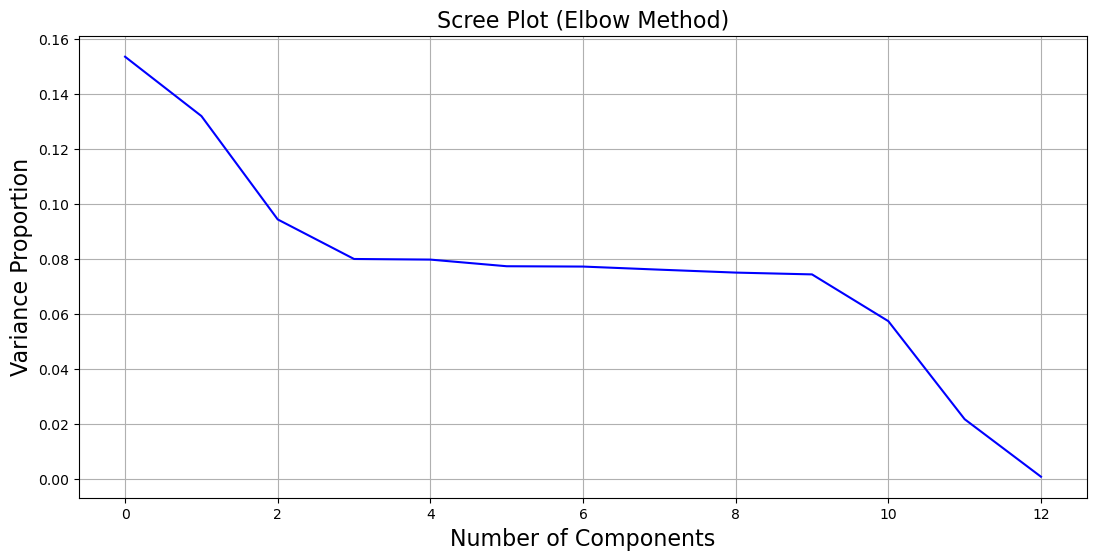

In [12]:
plt.figure(figsize=(13, 6))
plt.plot(pcomp,
        exp_var,
        'b-')
plt.title('Scree Plot (Elbow Method)', fontsize = 16)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Variance Proportion', fontsize = 16)
plt.grid()
plt.show

In [13]:
# Kaiser method
# 6 components will be kept
var = pca.explained_variance_
var

array([1.99569541, 1.71548793, 1.22708234, 1.0402671 , 1.03734702,
       1.00598239, 1.0044298 , 0.9898703 , 0.97597888, 0.96745167,
       0.74659936, 0.28339498, 0.01171295])

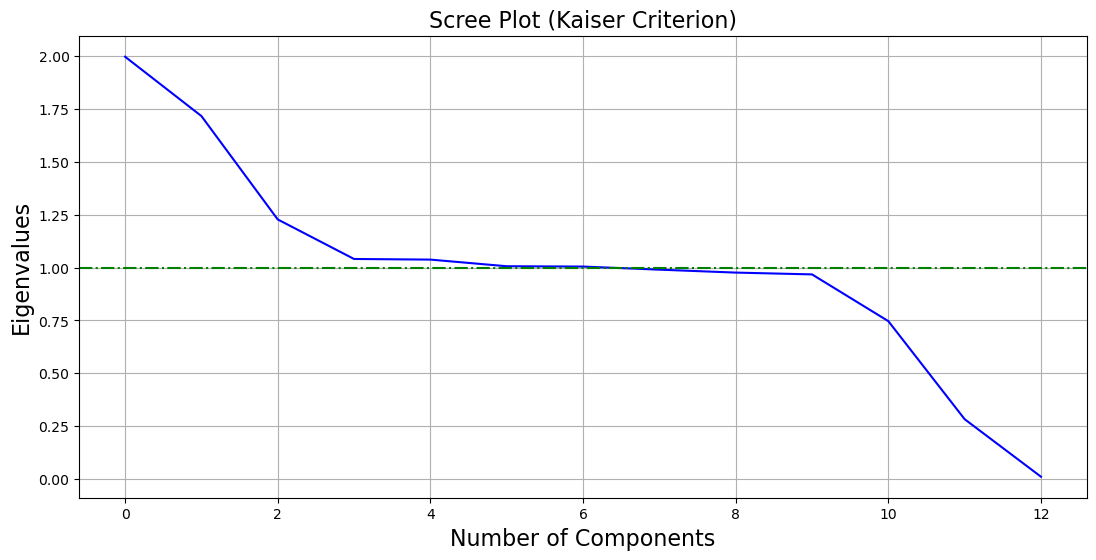

In [14]:
plt.figure(figsize = (13, 6))
plt.plot(pcomp,
        var,
        'b')
plt.title('Scree Plot (Kaiser Criterion)', fontsize = 16)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Eigenvalues', fontsize = 16)
plt.axhline(y = 1, color = 'g', linestyle = 'dashdot')
plt.grid()
plt.show()

## D3. Variance of Each Principal Component

In [15]:
# Final PCA with 6 components according to kaiser method above
final_pca = PCA(n_components = 6, random_state = 300)
# Fitting PCA to standardized df
final_pca.fit(scaled_df)
final_scaled_pca = final_pca.transform(scaled_df)
# Final PCA loadings
final_scaled_pca_loadings = pd.DataFrame(final_pca.components_.T, 
                              columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"], 
                              index = list(scaled_df.columns))
final_scaled_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Age,0.084650,0.700793,0.011244,-0.020860,0.010691,0.011755
Children,0.034537,0.017244,-0.034510,0.344621,0.158969,0.231131
Income,-0.019701,-0.019176,0.075776,-0.067301,0.412381,-0.149024
VitD_levels,-0.001995,0.020340,-0.020176,0.526197,-0.213021,-0.366372
vitD_supp,0.025381,0.014511,0.029741,-0.262904,0.377611,-0.097049
Doc_visits,-0.006991,0.015446,0.017291,0.096735,0.282211,-0.820104
Full_meals_eaten,-0.020712,0.031960,-0.103248,0.454738,-0.385982,-0.050904
Initial_days,0.699994,-0.089859,-0.022902,-0.007101,-0.018751,-0.017957
TotalCharge,0.701146,-0.079267,-0.020888,-0.003830,-0.019601,-0.019199
Additional_charges,0.085029,0.700745,0.013730,-0.004630,0.019713,0.016979


In [16]:
# Total contribution of each principal component in final PCA
print(f"Variance of each principal component:")
pc_contributions = list(final_pca.explained_variance_ratio_)
pc_names = list(final_scaled_pca_loadings.columns)
for i in range(len(pc_names)):
    print(f"For {pc_names[i]}, the contribution is {round(pc_contributions[i] * 100, 2)}%")

Variance of each principal component:
For PC1, the contribution is 15.35%
For PC2, the contribution is 13.19%
For PC3, the contribution is 9.44%
For PC4, the contribution is 8.0%
For PC5, the contribution is 7.98%
For PC6, the contribution is 7.74%


## D4. Total Variance Captured by the Principal Components

In [17]:
print(f"These 6 principal components explain {round(sum(final_pca.explained_variance_ratio_ * 100), 2)}% of variance in the data.")

These 6 principal components explain 61.7% of variance in the data.


## D5. Summary of Results
Thanks to the PCA and the Kaiser rule of the medical datasets' continuous variables, we can see that we only need 6 of the original 13 components. The resulting 6 Principal Components explain 61.7% of the data.

We can also see that the Kaiser rule outperformed the elbow method. The Kaiser method states that if a principal component has an eigenvalue of 1 or greater, it can be kept as an important value, which is why 6 principal components were selected. 1 is not a random value - it is the variance of the normalized data.